In [1]:
# Step 1. Import neccesary Python libraries
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

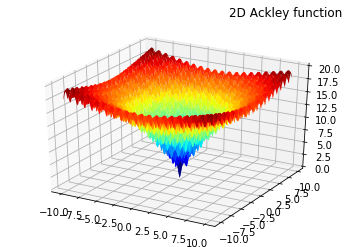

In [2]:
# Step 2. Define 2-dimensional Ackley function and plot it

def Ackley(x1, x2):
    func = 20 + np.e -20*np.exp(-0.2*np.sqrt((x1**2+x2**2)/2))-np.exp((np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2))/2)
    return func

# plot Ackley function in [-10, 10] space (for x1 and x2)
x1 = np.arange(-10.0,10.0,0.1)
x2 = np.arange(-10.0,10.0,0.1)
X,Y = meshgrid(x1, x2) # grid of point
Z = Ackley(X, Y) # evaluation of the function on the grid
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(0, 20.0)
surf = ax.plot_surface(X, Y, Z,cmap=plt.cm.jet)
plt.title('2D Ackley function',fontsize=12, loc="right" )
plt.show()

In [3]:
# Step 3. Writing Simulated-Annealing algoritm

def SimAnneal(min_lim, max_lim, t_init, n_iter, n_tweak, cool_scheme):
    x1 = 2                       # random inicial point for varialble 1
    x2 = -1                      # random inicial point for varialble 2
                                                # starting point
    Initial_sol = Ackley(x1, x2)                # initial solution
    Best_sol = Initial_sol                      # initial best solution
    t = t_init                                  # initial temperature
    BS = []                      # empty array for storing best-solutions(BS)
    x1b =[]                      # empty array for storing x1 points for BS
    x2b =[]                      # empty array for storing x2 points for BS
    
    for i in range(n_iter):
        BS.append(Best_sol)     # storing BS in each iteration
        x1b.append(x1)          # storing BS x1 var in each iteration
        x2b.append(x2)          # storing BS x2 var in each iteration
        for j in range(n_tweak):
            x1t = x1 + 2*(random.random() - 0.5)     # tweaking x1
            x2t = x2 + 2*(random.random() - 0.5)     # tweaking x2
            
            # Setting upper and lower boundaries
            x1t = max(min(x1t,max_lim),min_lim)
            x2t = max(min(x2t,max_lim),min_lim)
            # print(x1t)
            Current_sol = Ackley(x1t, x2t)            # current solution for tweaked points
            p = np.exp((Initial_sol - Current_sol)/t) # probability criteria
            p0 = random.random()                      # random value from 0-1
            
            if (Initial_sol > Current_sol) or (p0 > p): # acceptance criteria for tewak
                Initial_sol = Current_sol               
                x1c= x1t
                x2c= x2t
                    
        if Initial_sol < Best_sol:                    # acceptance criteria after iteration
            Best_sol = Initial_sol
        x1 = x1c
        x2 = x2c
        
        # changing cooling time for different schedules
        if cool_scheme == "FC":
            t = 0.9*t                 # fast schedule with 0.9 alfa value from [0.85-0.96] range
        elif cool_scheme == "EXP":
            eps = 0.0025
            t = t*(1- eps)**i         # expon schedule with 0.0025 epsilon value
        elif cool_scheme == "LOG":
            t = t/(np.log(i+2))       # log schedule 
        else:
            print("Unknown schedule")
        
    return BS, x1b, x2b               # return array of best function and corresp points for each iter  

In [4]:
# Step 4. Create plotting function for plotting results
def Plotter(BSf,x1f,x2f,Scheme):
    fig = plt.figure()
    plot1 = fig.add_subplot(211)
    plot1.plot(BSf,'r.-')
    plot1.legend(['Best Solution for {}'.format(Scheme)])
    plot2 = fig.add_subplot(212)
    plot2.plot(x1f,'b.-')
    plot2.plot(x2f,'g--')
    plot2.legend(['x1','x2'])
    plt.show()

In [5]:
# Step 5. Running model for 3 different cooling schedules and printing last points
#[max_lim, min_lim, t_init,n_iter,m_tweak,cooling_schedule]   => reminder for inputs

[BSf_fc,x1f_fc,x2f_fc] = SimAnneal(-10, 10, 150, 20, 500, "FC")
print("1.FC cooling  => Best_sol=",round(BSf_fc[-1]),", Minimum = [", round(x1f_fc[-1],5),",",round(x2f_fc[-1],5),"]")

[BSf_exp,x1f_exp,x2f_exp] = SimAnneal(-10, 10, 150, 20, 500, "EXP")
print("2.EXP cooling => Best_sol=",round(BSf_exp[-1]),", Minimum = [", round(x1f_exp[-1],5),",",round(x2f_exp[-1],5),"]")

[BSf_log,x1f_log,x2f_log] = SimAnneal(-10, 10, 150, 20, 500, "LOG")
print("3.LOG cooling => Best_sol=",round(BSf_log[-1]),", Minimum = [", round(x1f_log[-1],5),",",round(x2f_log[-1],5),"]")


1.FC cooling  => Best_sol= 0.0 , Minimum = [ -0.10095 , -0.05026 ]
2.EXP cooling => Best_sol= 0.0 , Minimum = [ 0.17576 , -0.21124 ]
3.LOG cooling => Best_sol= 1.0 , Minimum = [ -1.56283 , 0.61772 ]


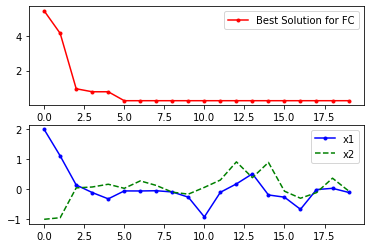

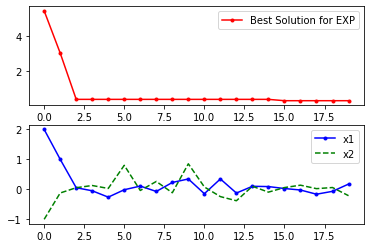

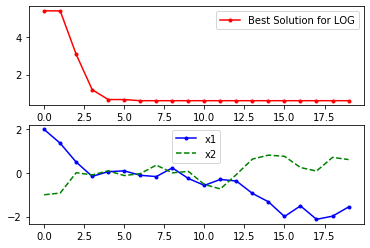

In [6]:
# Step 6. Plotting the results
Plotter(BSf_fc,x1f_fc,x2f_fc,"FC")
Plotter(BSf_exp,x1f_exp,x2f_exp,"EXP")
Plotter(BSf_log,x1f_log,x2f_log,"LOG")

Here we can see on plots how each schedule is performing and also how x1 and x2 points are being choosen during the iteration.

In [7]:
# Step 6. Changing iteration number with FC schedule
[BSf_fc,x1f_fc,x2f_fc] = SimAnneal(-10, 10, 150, 20, 500, "FC")
print("1. 20 iter  => Best_sol=",round(BSf_fc[-1],5),", Minimum = [", round(x1f_fc[-1],5),",",round(x2f_fc[-1],5),"]")
[BSf_fc,x1f_fc,x2f_fc] = SimAnneal(-10, 10, 150, 40, 500, "FC")
print("2. 40 iter  => Best_sol=",round(BSf_fc[-1],5),", Minimum = [", round(x1f_fc[-1],5),",",round(x2f_fc[-1],5),"]")
[BSf_fc,x1f_fc,x2f_fc] = SimAnneal(-10, 10, 150, 60, 500, "FC")
print("3. 60 iter  => Best_sol=",round(BSf_fc[-1],5),", Minimum = [", round(x1f_fc[-1],5),",",round(x2f_fc[-1],5),"]")

1. 20 iter  => Best_sol= 0.24802 , Minimum = [ 0.09009 , 0.10279 ]
2. 40 iter  => Best_sol= 0.76455 , Minimum = [ 1.51124 , -0.24434 ]
3. 60 iter  => Best_sol= 0.21361 , Minimum = [ -0.76783 , -2.46623 ]


As we can see, sometimes high number of iterations is not good with FC scheme and SA method, as the algoritm can pass the global minimum because of probability acceptance criteria.

In [8]:
# Step 7. Changing  number of tweaks in each iteration with FC schedule
[BSf_fc,x1f_fc,x2f_fc] = SimAnneal(-10, 10, 150, 20, 50, "FC")
print("1. 50 tweak  => Best_sol=",round(BSf_fc[-1],5),", Minimum = [", round(x1f_fc[-1],5),",",round(x2f_fc[-1],5),"]")
[BSf_fc,x1f_fc,x2f_fc] = SimAnneal(-10, 10, 150, 20, 200, "FC")
print("2. 150 tweak  => Best_sol=",round(BSf_fc[-1],5),", Minimum = [", round(x1f_fc[-1],5),",",round(x2f_fc[-1],5),"]")
[BSf_fc,x1f_fc,x2f_fc] = SimAnneal(-10, 10, 150, 20, 500, "FC")
print("3. 500 tweak  => Best_sol=",round(BSf_fc[-1],5),", Minimum = [", round(x1f_fc[-1],5),",",round(x2f_fc[-1],5),"]")
[BSf_fc,x1f_fc,x2f_fc] = SimAnneal(-10, 10, 150, 20, 900, "FC")
print("4. 900 tweak  => Best_sol=",round(BSf_fc[-1],5),", Minimum = [", round(x1f_fc[-1],5),",",round(x2f_fc[-1],5),"]")
[BSf_fc,x1f_fc,x2f_fc] = SimAnneal(-10, 10, 150, 20, 1500, "FC")
print("5. 1500 tweak  => Best_sol=",round(BSf_fc[-1],5),", Minimum = [", round(x1f_fc[-1],5),",",round(x2f_fc[-1],5),"]")

1. 50 tweak  => Best_sol= 0.36122 , Minimum = [ -0.11164 , -0.27805 ]
2. 150 tweak  => Best_sol= 0.40908 , Minimum = [ -0.05906 , 0.12297 ]
3. 500 tweak  => Best_sol= 0.54416 , Minimum = [ 0.10609 , 0.02575 ]
4. 900 tweak  => Best_sol= 0.25524 , Minimum = [ 0.90881 , -0.01061 ]
5. 1500 tweak  => Best_sol= 0.2958 , Minimum = [ -0.16559 , 0.40329 ]


Thank you! Nairi